
New Catalyst Fraction = 0.01
Old Catalyst Fraction = 0.009900990099009875
Change = 1.0%

Calling FFC just-in-time (JIT) compiler, this may take some time.
Calling FFC just-in-time (JIT) compiler, this may take some time.
Pulse #: 0
Percent: [------------------->] 99.8%Completed in: 4.142 seconds
no experimental data


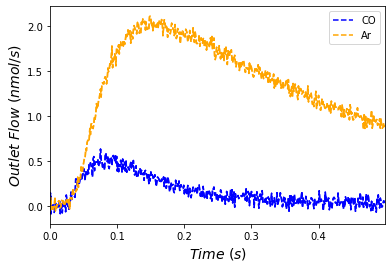

SystemExit: 

In [2]:
from tapsolver import *

new_reactor = reactor()

# Define the gasses

species = reactor_species()

CO = define_gas()
CO.mass = 28
CO.intensity = 1
CO.delay = 0.0
CO.noise = 0.05
species.add_gas('CO',CO)

Ar = define_gas()
Ar.mass = 40
Ar.intensity = 1
Ar.noise = 0.05
species.add_inert_gas('Ar',Ar)

s = define_adspecies()
s.concentration = 0
species.add_adspecies('CO*',s)

s = define_adspecies()
s.concentration = 100
species.add_adspecies('*',s)

mech = mechanism()

mech.elementary_processes[0] = elementary_process('CO + * <-> CO*')
mech.elementary_processes[0].forward.k = 20
mech.elementary_processes[0].backward.k = 0.3

for j in mech.elementary_processes:
	mech.elementary_processes[j].forward.use = 'k'
	try:
		mech.elementary_processes[j].backward.use = 'k'
	except:
		pass

mechanism_constructor(mech)

simulation = TAPobject()
simulation.reactor = new_reactor
simulation.reactor_species = species
simulation.mechanism = mech

forward_problem(0.5,1,simulation)
flux_graph(simulation)